In [1]:
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 11})
import matplotlib.ticker as ticker

In [2]:
alphas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
criterion = 'l2-sp'
dataset_directory = '/cluster/tufts/hugheslab/eharve06/CIFAR-10'
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/tuned_CIFAR-10'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
ns = [100, 1000, 10000, 50000]
random_states = [1001, 2001, 3001]

columns = ['criterion', 'model_name', 'n', 'random_state', 'runtime', 'val_acc', 'val_nll']
tuned_df = pd.DataFrame(columns=columns)

for alpha, beta, lr_0, n, random_state in itertools.product(alphas, betas, lr_0s, ns, random_states):
    model_name = f'{criterion}_alpha={alpha}_beta={beta}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [criterion, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    tuned_df.loc[len(tuned_df)] = row
    
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10'

columns = ['criterion', 'model_name', 'n', 'random_state', 'runtime', 'test_acc', 'test_nll']
retrained_df = pd.DataFrame(columns=columns)

for index, row in tuned_df.iterrows():
    temp_df = pd.read_csv(f'{experiments_directory}/{row.model_name}.csv')
    row = [row.criterion, row.model_name, row.n, row.random_state, temp_df['train_sec/epoch'].sum(), temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    retrained_df.loc[len(retrained_df)] = row

retrained_df

,criterion,model_name,n,random_state,runtime,test_acc,test_nll
0,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=100_rand...,100,1001,1731.240962,0.5813,1.322462
1,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=100_rand...,100,2001,1711.419768,0.5562,1.386775
2,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=100_rand...,100,3001,1720.188420,0.6234,1.151327
3,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=1000_ran...,1000,1001,2124.317451,0.8842,0.384104
4,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=1000_ran...,1000,2001,2118.474334,0.8785,0.389773
...,...,...,...,...,...,...,...
1723,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=10000_r...,10000,2001,2285.013988,0.8152,0.849668
1724,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=10000_r...,10000,3001,2265.344910,0.8094,0.841590
1725,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=50000_r...,50000,1001,2087.493067,0.8026,0.851022
1726,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=50000_r...,50000,2001,2229.805646,0.8148,0.853667


In [3]:
tuned_df.to_csv('tuned_CIFAR-10_ResNet_50.csv', index=False)
retrained_df.to_csv('retrained_CIFAR-10_ResNet_50.csv', index=False)

In [4]:
alphas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
criterion = 'l2-sp'
dataset_directory = '/cluster/tufts/hugheslab/eharve06/Flowers_102'
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/tuned_Flowers_102'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
ns = [510, 1020]
random_states = [1001, 2001, 3001]

columns = ['criterion', 'model_name', 'n', 'random_state', 'runtime', 'val_acc', 'val_nll']
tuned_df = pd.DataFrame(columns=columns)

for alpha, beta, lr_0, n, random_state in itertools.product(alphas, betas, lr_0s, ns, random_states):
    model_name = f'{criterion}_alpha={alpha}_beta={beta}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [criterion, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    tuned_df.loc[len(tuned_df)] = row
    
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_Flowers_102'

columns = ['criterion', 'model_name', 'n', 'random_state', 'runtime', 'test_acc', 'test_nll']
retrained_df = pd.DataFrame(columns=columns)

for index, row in tuned_df.iterrows():
    temp_df = pd.read_csv(f'{experiments_directory}/{row.model_name}.csv')
    row = [row.criterion, row.model_name, row.n, row.random_state, temp_df['train_sec/epoch'].sum(), temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    retrained_df.loc[len(retrained_df)] = row

retrained_df

,criterion,model_name,n,random_state,runtime,test_acc,test_nll
0,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=510_rand...,510,1001,1535.906535,0.755216,1.331653
1,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=510_rand...,510,2001,1488.316173,0.767106,1.246255
2,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=510_rand...,510,3001,1713.466016,0.778095,1.185361
3,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=1020_ran...,1020,1001,1468.438030,0.872380,0.697942
4,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=1020_ran...,1020,2001,1758.796065,0.882194,0.675922
...,...,...,...,...,...,...,...
859,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=510_ran...,510,2001,1483.410068,0.644529,3.215339
860,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=510_ran...,510,3001,1483.771694,0.640550,3.210751
861,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=1020_ra...,1020,1001,1464.862879,0.673903,3.254760
862,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=1020_ra...,1020,2001,1505.978922,0.650377,3.258630


In [5]:
tuned_df.to_csv('tuned_Flowers_102_ResNet_50.csv', index=False)
retrained_df.to_csv('retrained_Flowers_102_ResNet_50.csv', index=False)

In [6]:
alphas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
criterion = 'l2-sp'
dataset_directory = '/cluster/tufts/hugheslab/eharve06/Oxford-IIIT_Pet'
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/tuned_Oxford-IIIT_Pet'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
ns = [370, 3441]
random_states = [1001, 2001, 3001]

columns = ['criterion', 'model_name', 'n', 'random_state', 'runtime', 'val_acc', 'val_nll']
tuned_df = pd.DataFrame(columns=columns)

for alpha, beta, lr_0, n, random_state in itertools.product(alphas, betas, lr_0s, ns, random_states):
    model_name = f'{criterion}_alpha={alpha}_beta={beta}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [criterion, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    tuned_df.loc[len(tuned_df)] = row
    
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_Oxford-IIIT_Pet'

columns = ['criterion', 'model_name', 'n', 'random_state', 'runtime', 'test_acc', 'test_nll']
retrained_df = pd.DataFrame(columns=columns)

for index, row in tuned_df.iterrows():
    temp_df = pd.read_csv(f'{experiments_directory}/{row.model_name}.csv')
    row = [row.criterion, row.model_name, row.n, row.random_state, temp_df['train_sec/epoch'].sum(), temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    retrained_df.loc[len(retrained_df)] = row

retrained_df

,criterion,model_name,n,random_state,runtime,test_acc,test_nll
0,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=370_rand...,370,1001,1370.007978,0.749886,0.960920
1,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=370_rand...,370,2001,1408.123719,0.755925,0.952158
2,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=370_rand...,370,3001,1401.989089,0.766192,0.933798
3,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=3441_ran...,3441,1001,1400.816236,0.928762,0.279900
4,l2-sp,l2-sp_alpha=0.01_beta=0.01_lr_0=0.1_n=3441_ran...,3441,2001,1403.407756,0.927361,0.277136
...,...,...,...,...,...,...,...
859,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=370_ran...,370,2001,1473.484066,0.878151,0.801126
860,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=370_ran...,370,3001,1411.118942,0.888890,0.807195
861,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=3441_ra...,3441,1001,2214.709541,0.869254,0.900682
862,l2-sp,l2-sp_alpha=0.0_beta=0.0_lr_0=0.0001_n=3441_ra...,3441,2001,1890.625961,0.870332,0.899985


In [7]:
tuned_df.to_csv('tuned_Oxford-IIIT_Pet_ResNet_50.csv', index=False)
retrained_df.to_csv('retrained_Oxford-IIIT_Pet_ResNet_50.csv', index=False)

In [8]:
cifar10_dictionary = np.load('CIFAR-10_ResNet_50_dictionary.npy', allow_pickle=True).item()
flowers_102_dictionary = np.load('Flowers_102_ResNet_50_dictionary.npy', allow_pickle=True).item()
oxfordiiit_pet_dictionary = np.load('Oxford-IIIT_Pet_ResNet_50_dictionary.npy', allow_pickle=True).item()

In [9]:
d = 23528522
#d = 85806346
#d = 27827818
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_VI'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
methods = ['l2-sp']
ns = [100, 1000, 10000, 50000]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
cifar10_de_elbo_tuned_df = pd.DataFrame(columns=columns)

for lr_0, method, n, random_state in itertools.product(lr_0s, methods, ns, random_states):
    model_name = f'{method}_kappa={d/n}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    cifar10_de_elbo_tuned_df.loc[len(cifar10_de_elbo_tuned_df)] = row
    
min_indices = cifar10_de_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
cifar10_de_elbo_retrained_df = cifar10_de_elbo_tuned_df.loc[min_indices]
cifar10_de_elbo_retrained_df['total_time'] = cifar10_de_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [10]:
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_diagEF'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
method = 'l2-sp'
ns = [100, 1000, 10000, 50000]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
cifar10_laplace_tuned_df = pd.DataFrame(columns=columns)

for lr_0, n, random_state in itertools.product(lr_0s, ns, random_states):
    model_name = f'{method}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    cifar10_laplace_tuned_df.loc[len(cifar10_laplace_tuned_df)] = row
    
min_indices = cifar10_laplace_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
cifar10_laplace_retrained_df = cifar10_laplace_tuned_df.loc[min_indices]
cifar10_laplace_retrained_df['total_time'] = cifar10_laplace_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [11]:
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_VI'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
methods = ['l2-sp']
ns = [100, 1000, 10000, 50000]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
cifar10_elbo_tuned_df = pd.DataFrame(columns=columns)

for lr_0, method, n, random_state in itertools.product(lr_0s, methods, ns, random_states):
    model_name = f'{method}_kappa=1.0_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    cifar10_elbo_tuned_df.loc[len(cifar10_elbo_tuned_df)] = row
    
min_indices = cifar10_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
cifar10_elbo_retrained_df = cifar10_elbo_tuned_df.loc[min_indices]
cifar10_elbo_retrained_df['total_time'] = cifar10_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [12]:
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_Flowers_102_VI'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
methods = ['l2-sp']
ns = [510, 1020]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
flowers_102_elbo_tuned_df = pd.DataFrame(columns=columns)

for lr_0, method, n, random_state in itertools.product(lr_0s, methods, ns, random_states):
    model_name = f'{method}_kappa=1.0_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    flowers_102_elbo_tuned_df.loc[len(flowers_102_elbo_tuned_df)] = row
    
min_indices = flowers_102_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
flowers_102_elbo_retrained_df = flowers_102_elbo_tuned_df.loc[min_indices]
flowers_102_elbo_retrained_df['total_time'] = flowers_102_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [13]:
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_Flowers_102_diagEF'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
method = 'l2-sp'
ns = [510, 1020]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
flowers_102_laplace_tuned_df = pd.DataFrame(columns=columns)

for lr_0, n, random_state in itertools.product(lr_0s, ns, random_states):
    model_name = f'{method}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    flowers_102_laplace_tuned_df.loc[len(flowers_102_laplace_tuned_df)] = row
    
min_indices = flowers_102_laplace_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
flowers_102_laplace_retrained_df = flowers_102_laplace_tuned_df.loc[min_indices]
flowers_102_laplace_retrained_df['total_time'] = flowers_102_laplace_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [14]:
d = 23717030
#d = 85877094
#d = 27898566
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_Flowers_102_VI'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
methods = ['l2-sp']
ns = [510, 1020]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
flowers_102_de_elbo_tuned_df = pd.DataFrame(columns=columns)

for lr_0, method, n, random_state in itertools.product(lr_0s, methods, ns, random_states):
    model_name = f'{method}_kappa={d/n}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    flowers_102_de_elbo_tuned_df.loc[len(flowers_102_de_elbo_tuned_df)] = row
    
min_indices = flowers_102_de_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
flowers_102_de_elbo_retrained_df = flowers_102_de_elbo_tuned_df.loc[min_indices]
flowers_102_de_elbo_retrained_df['total_time'] = flowers_102_de_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [15]:
d = 23583845
#d = 85827109
#d = 27848581
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_Oxford-IIIT_Pet_VI'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
methods = ['l2-sp']
ns = [370, 3441]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
oxfordiiit_pet_de_elbo_tuned_df = pd.DataFrame(columns=columns)

for lr_0, method, n, random_state in itertools.product(lr_0s, methods, ns, random_states):
    model_name = f'{method}_kappa={d/n}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    oxfordiiit_pet_de_elbo_tuned_df.loc[len(oxfordiiit_pet_de_elbo_tuned_df)] = row
    
min_indices = oxfordiiit_pet_de_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
oxfordiiit_pet_de_elbo_retrained_df = oxfordiiit_pet_de_elbo_tuned_df.loc[min_indices]
oxfordiiit_pet_de_elbo_retrained_df['total_time'] = oxfordiiit_pet_de_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [16]:
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_Oxford-IIIT_Pet_diagEF'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
method = 'l2-sp'
ns = [370, 3441]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
oxfordiiit_pet_laplace_tuned_df = pd.DataFrame(columns=columns)

for lr_0, n, random_state in itertools.product(lr_0s, ns, random_states):
    model_name = f'{method}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    oxfordiiit_pet_laplace_tuned_df.loc[len(oxfordiiit_pet_laplace_tuned_df)] = row
    
min_indices = oxfordiiit_pet_laplace_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
oxfordiiit_pet_laplace_retrained_df = oxfordiiit_pet_laplace_tuned_df.loc[min_indices]
oxfordiiit_pet_laplace_retrained_df['total_time'] = oxfordiiit_pet_laplace_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [17]:
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_Oxford-IIIT_Pet_VI'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
methods = ['l2-sp']
ns = [370, 3441]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
oxfordiiit_pet_elbo_tuned_df = pd.DataFrame(columns=columns)

for lr_0, method, n, random_state in itertools.product(lr_0s, methods, ns, random_states):
    model_name = f'{method}_kappa=1.0_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    oxfordiiit_pet_elbo_tuned_df.loc[len(oxfordiiit_pet_elbo_tuned_df)] = row
    
min_indices = oxfordiiit_pet_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
oxfordiiit_pet_elbo_retrained_df = oxfordiiit_pet_elbo_tuned_df.loc[min_indices]
oxfordiiit_pet_elbo_retrained_df['total_time'] = oxfordiiit_pet_elbo_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [18]:
def plot_dictionary(ax, bootstrap_dictionary, n, random_states, markers=['o', '^', 's']):
    for index, random_state in enumerate(random_states):
        x = bootstrap_dictionary[n][random_state][:,:,:,0].mean(axis=(0,2,))
        y = bootstrap_dictionary[n][random_state][:,:,:,1].mean(axis=(0,2,))
        lower_x, upper_x = np.percentile(bootstrap_dictionary[n][random_state][:,:,:,0].mean(axis=(2,)), [2.5, 97.5], axis=(0,))
        lower_y, upper_y = np.percentile(bootstrap_dictionary[n][random_state][:,:,:,1].mean(axis=(2,)), [2.5, 97.5], axis=(0,))
        ax.scatter(x[-1]/3600, y[-1], color='#1F77B4', marker=markers[index], zorder=3)
        ax.plot(x/3600, y, color='#1F77B4', zorder=2)
        ax.fill_between(x/3600, lower_y, upper_y, alpha=0.1, color='#1F77B4', zorder=2)

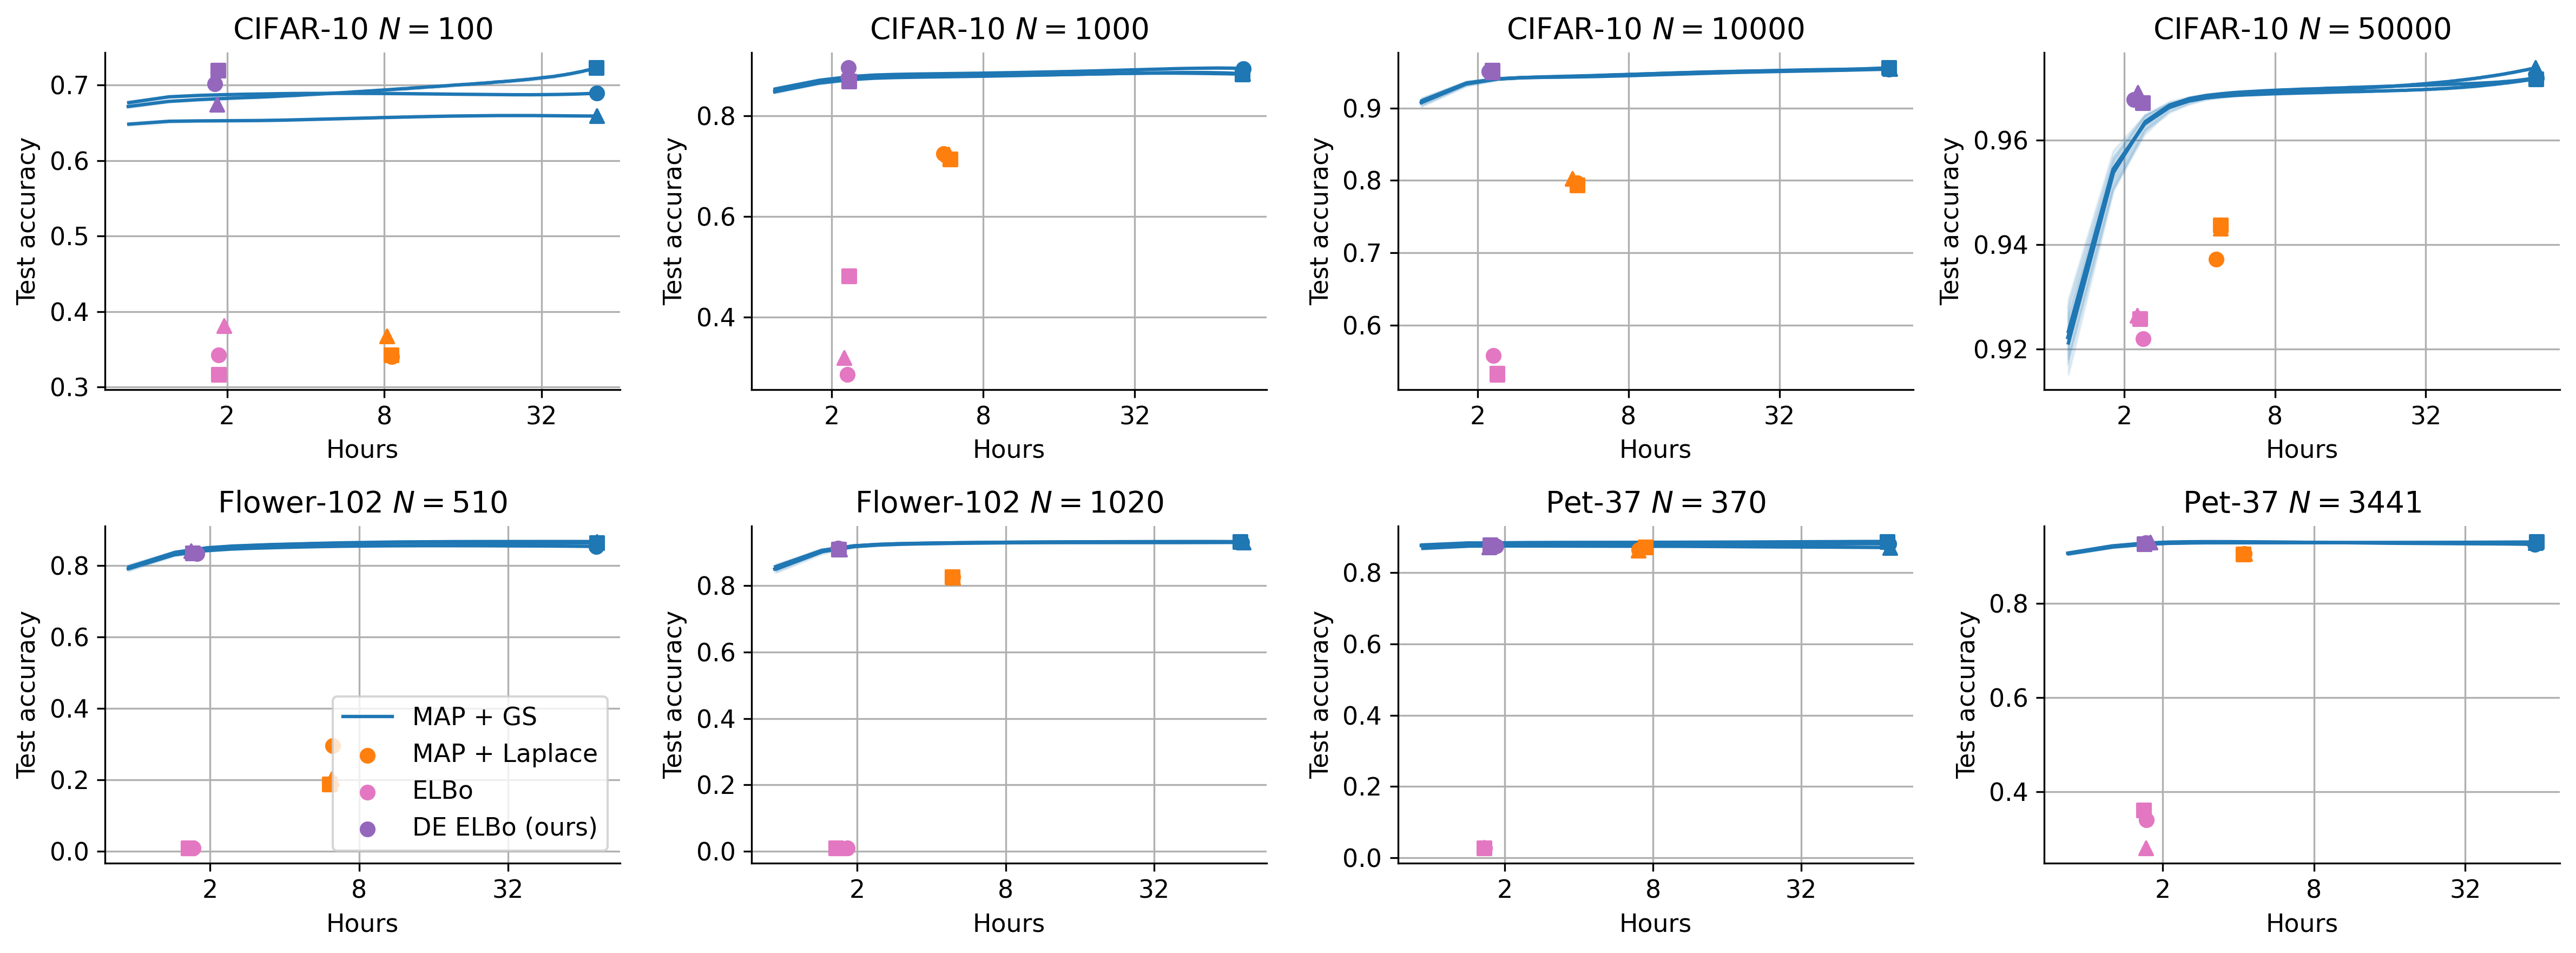

In [19]:
markers = ['o', '^', 's']

ncols, nrows = 4, 2
fig, axs = plt.subplots(dpi=300, figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows)

# Plot 1
plot_dictionary(axs[0,0], cifar10_dictionary, 100, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==100].total_time.values/3600, cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==100].test_acc.values)):
    axs[0,0].scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==100].total_time.values/3600, cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==100].test_acc.values)):
    axs[0,0].scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==100].total_time.values/3600, cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==100].test_acc.values)):
    axs[0,0].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

axs[0,0].set_xscale('log', base=2)
ticks = axs[0,0].get_xticks()
axs[0,0].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[0,0].spines[['right', 'top']].set_visible(False)
axs[0,0].set_title(r'CIFAR-10 $N=100$')
axs[0,0].set_xlabel('Hours')
axs[0,0].set_ylabel('Test accuracy')
axs[0,0].grid()

# Plot 2
plot_dictionary(axs[0,1], cifar10_dictionary, 1000, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==1000].total_time.values/3600, cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==1000].test_acc.values)):
    axs[0,1].scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==1000].total_time.values/3600, cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==1000].test_acc.values)):
    axs[0,1].scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==1000].total_time.values/3600, cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==1000].test_acc.values)):
    axs[0,1].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

axs[0,1].set_xscale('log', base=2)
ticks = axs[0,1].get_xticks()
axs[0,1].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[0,1].spines[['right', 'top']].set_visible(False)
axs[0,1].set_title(r'CIFAR-10 $N=1000$')
axs[0,1].set_xlabel('Hours')
axs[0,1].set_ylabel('Test accuracy')
axs[0,1].grid()

# Plot 3
plot_dictionary(axs[0,2], cifar10_dictionary, 10000, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==10000].total_time.values/3600, cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==10000].test_acc.values)):
    axs[0,2].scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==10000].total_time.values/3600, cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==10000].test_acc.values)):
    axs[0,2].scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==10000].total_time.values/3600, cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==10000].test_acc.values)):
    axs[0,2].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

axs[0,2].set_xscale('log', base=2)
ticks = axs[0,2].get_xticks()
axs[0,2].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[0,2].spines[['right', 'top']].set_visible(False)
axs[0,2].set_title(r'CIFAR-10 $N=10000$')
axs[0,2].set_xlabel('Hours')
axs[0,2].set_ylabel('Test accuracy')
axs[0,2].grid()

# Plot 4
plot_dictionary(axs[0,3], cifar10_dictionary, 50000, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==50000].total_time.values/3600, cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==50000].test_acc.values)):
    axs[0,3].scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==50000].total_time.values/3600, cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==50000].test_acc.values)):
    axs[0,3].scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==50000].total_time.values/3600, cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==50000].test_acc.values)):
    axs[0,3].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

axs[0,3].set_xscale('log', base=2)
ticks = axs[0,3].get_xticks()
axs[0,3].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[0,3].spines[['right', 'top']].set_visible(False)
axs[0,3].set_title(r'CIFAR-10 $N=50000$')
axs[0,3].set_xlabel('Hours')
axs[0,3].set_ylabel('Test accuracy')
axs[0,3].grid()

# Plot 5
plot_dictionary(axs[1,0], flowers_102_dictionary, 510, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(flowers_102_elbo_retrained_df[flowers_102_elbo_retrained_df.n==510].total_time.values/3600, flowers_102_elbo_retrained_df[flowers_102_elbo_retrained_df.n==510].test_acc.values)):
    axs[1,0].scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(flowers_102_laplace_retrained_df[flowers_102_laplace_retrained_df.n==510].total_time.values/3600, flowers_102_laplace_retrained_df[flowers_102_laplace_retrained_df.n==510].test_acc.values)):
    axs[1,0].scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(flowers_102_de_elbo_retrained_df[flowers_102_de_elbo_retrained_df.n==510].total_time.values/3600, flowers_102_de_elbo_retrained_df[flowers_102_de_elbo_retrained_df.n==510].test_acc.values)):
    axs[1,0].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

axs[1,0].set_xscale('log', base=2)
ticks = axs[1,0].get_xticks()
axs[1,0].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[1,0].spines[['right', 'top']].set_visible(False)
axs[1,0].set_title(r'Flower-102 $N=510$')
axs[1,0].set_xlabel('Hours')
axs[1,0].set_ylabel('Test accuracy')
axs[1,0].grid()

# Legend
axs[1,0].plot([], [], color='#1F77B4', label='MAP + GS', zorder=3)
axs[1,0].scatter([], [], color='#FF7F0E', label='MAP + Laplace', zorder=3)
axs[1,0].scatter([], [], color='#E377C2', label='ELBo', zorder=3)
axs[1,0].scatter([], [], color='#9467BD', label='DE ELBo (ours)', zorder=3)
axs[1,0].legend(loc='lower right')

# Plot 6
plot_dictionary(axs[1,1], flowers_102_dictionary, 1020, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(flowers_102_elbo_retrained_df[flowers_102_elbo_retrained_df.n==1020].total_time.values/3600, flowers_102_elbo_retrained_df[flowers_102_elbo_retrained_df.n==1020].test_acc.values)):
    axs[1,1].scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(flowers_102_laplace_retrained_df[flowers_102_laplace_retrained_df.n==1020].total_time.values/3600, flowers_102_laplace_retrained_df[flowers_102_laplace_retrained_df.n==1020].test_acc.values)):
    axs[1,1].scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(flowers_102_de_elbo_retrained_df[flowers_102_de_elbo_retrained_df.n==1020].total_time.values/3600, flowers_102_de_elbo_retrained_df[flowers_102_de_elbo_retrained_df.n==1020].test_acc.values)):
    axs[1,1].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

axs[1,1].set_xscale('log', base=2)
ticks = axs[1,1].get_xticks()
axs[1,1].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[1,1].spines[['right', 'top']].set_visible(False)
axs[1,1].set_title(r'Flower-102 $N=1020$')
axs[1,1].set_xlabel('Hours')
axs[1,1].set_ylabel('Test accuracy')
axs[1,1].grid()

# Plot 7
plot_dictionary(axs[1,2], oxfordiiit_pet_dictionary, 370, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_elbo_retrained_df[oxfordiiit_pet_elbo_retrained_df.n==370].total_time.values/3600, oxfordiiit_pet_elbo_retrained_df[oxfordiiit_pet_elbo_retrained_df.n==370].test_acc.values)):
    axs[1,2].scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_laplace_retrained_df[oxfordiiit_pet_laplace_retrained_df.n==370].total_time.values/3600, oxfordiiit_pet_laplace_retrained_df[oxfordiiit_pet_laplace_retrained_df.n==370].test_acc.values)):
    axs[1,2].scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_de_elbo_retrained_df[oxfordiiit_pet_de_elbo_retrained_df.n==370].total_time.values/3600, oxfordiiit_pet_de_elbo_retrained_df[oxfordiiit_pet_de_elbo_retrained_df.n==370].test_acc.values)):
    axs[1,2].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
    
axs[1,2].set_xscale('log', base=2)
ticks = axs[1,2].get_xticks()
axs[1,2].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[1,2].spines[['right', 'top']].set_visible(False)
axs[1,2].set_title(r'Pet-37 $N=370$')
axs[1,2].set_xlabel('Hours')
axs[1,2].set_ylabel('Test accuracy')
axs[1,2].grid()

# Plot 8
plot_dictionary(axs[1,3], oxfordiiit_pet_dictionary, 3441, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_elbo_retrained_df[oxfordiiit_pet_elbo_retrained_df.n==3441].total_time.values/3600, oxfordiiit_pet_elbo_retrained_df[oxfordiiit_pet_elbo_retrained_df.n==3441].test_acc.values)):
    axs[1,3].scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_laplace_retrained_df[oxfordiiit_pet_laplace_retrained_df.n==3441].total_time.values/3600, oxfordiiit_pet_laplace_retrained_df[oxfordiiit_pet_laplace_retrained_df.n==3441].test_acc.values)):
    axs[1,3].scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_de_elbo_retrained_df[oxfordiiit_pet_de_elbo_retrained_df.n==3441].total_time.values/3600, oxfordiiit_pet_de_elbo_retrained_df[oxfordiiit_pet_de_elbo_retrained_df.n==3441].test_acc.values)):
    axs[1,3].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

axs[1,3].set_xscale('log', base=2)
ticks = axs[1,3].get_xticks()
axs[1,3].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[1,3].spines[['right', 'top']].set_visible(False)
axs[1,3].set_title(r'Pet-37 $N=3441$')
axs[1,3].set_xlabel('Hours')
axs[1,3].set_ylabel('Test accuracy')
axs[1,3].grid()


fig.tight_layout()
plt.show()

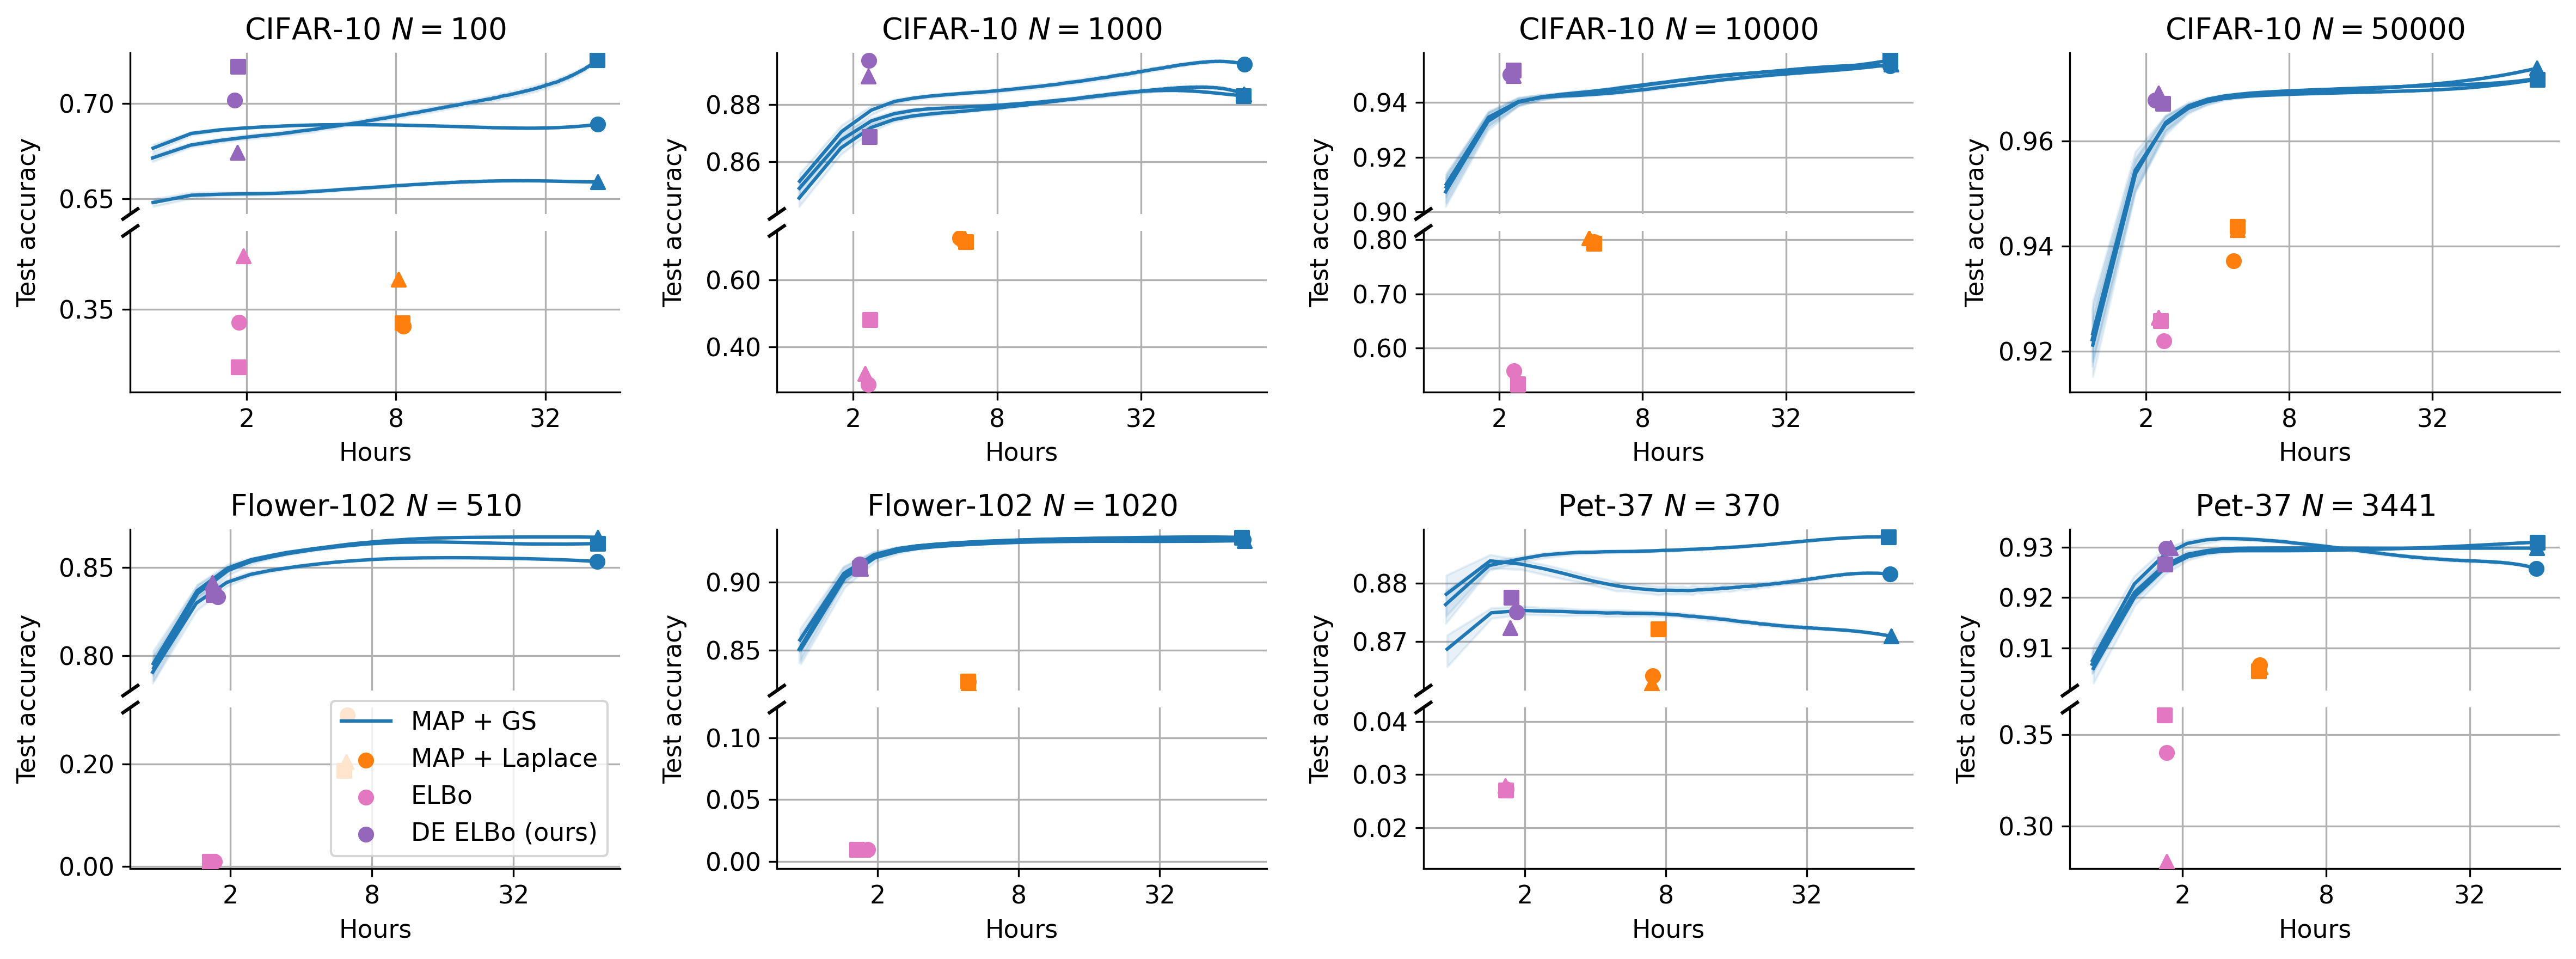

In [20]:
def break_axes(ax):
    d = 0.015
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (0.525 - d, 0.525 + d), **kwargs)
    ax.plot((-d, +d), (0.475 - d, 0.475 + d), **kwargs)
    
def decorate_ax(ax, title):
    ax.set_title(title)
    ax.set_xlabel('Hours')
    ax.set_ylabel('Test accuracy')
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xscale('log', base=2)
    ax_xticks = ax.get_xticks()
    ax.set_xticks([int(ax_xtick) for ax_xtick in ax_xticks[2:-2]], [int(ax_xtick) for ax_xtick in ax_xticks[2:-2]])
    ax.grid()
    
def decorate_hidden_ax(ax, title):
    ax.set_title(title)
    ax.set_xlabel('Hours')
    ax.set_ylabel('Test accuracy')
    ax.spines[['bottom', 'top', 'left', 'right']].set_visible(False)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.tick_params(axis='x', color=(0, 0, 0, 0), labelcolor=(0, 0, 0, 0), which='both')
    ax.tick_params(axis='y', color=(0, 0, 0, 0), labelcolor=(0, 0, 0, 0), which='both')
    
def decorate_broken_axes(ax1, ax2):
    
    ax1.spines[['bottom', 'top', 'right']].set_visible(False)
    ax2.spines[['right', 'top']].set_visible(False)
        
    ax1.set_xscale('log', base=2)
    ax2.set_xscale('log', base=2)
    ax1_xlim = ax1.get_xlim()
    ax1_xticks = ax1.get_xticks()
    ax1.set_xticks([int(ax1_xtick) for ax1_xtick in ax1_xticks[2:-2]], [int(ax1_xtick) for ax1_xtick in ax1_xticks[2:-2]])
    ax1.tick_params(axis='x', color=(0, 0, 0, 0), labelcolor=(0, 0, 0, 0), which='both')
    ax2.set_xlim(ax1_xlim)
    ax2.set_xticks([int(ax1_xtick) for ax1_xtick in ax1_xticks[2:-2]], [int(ax1_xtick) for ax1_xtick in ax1_xticks[2:-2]])
    
    ax1_distance = ax1.get_ylim()[1] - ax1.get_ylim()[0]
    ax2_mean = sum(ax2.get_ylim())/2
    ax2_distance = [max(0.0, ax2_mean - (ax1_distance/2)), max(ax2_mean + (ax1_distance/2) - (ax2_mean - (ax1_distance/2)), ax2_mean + (ax1_distance/2))]
    ax2.scatter(4*np.ones_like(ax2_distance), ax2_distance, color='#FFFFFF')
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(round(ax1.get_yticks()[-1] - ax1.get_yticks()[-2], 3)))
    if len(ax2.get_yticks()) > 5:
        ax2.yaxis.set_major_locator(ticker.AutoLocator())
    ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    
    ax1.grid()
    ax2.grid()
    
ncols, nrows = 4, 2
fig, axs = plt.subplots(dpi=300, figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows)

# Plot 1
decorate_hidden_ax(axs[0,0], r'CIFAR-10 $N=100$')

ins1_top = axs[0,0].inset_axes([0.0, 0.525, 1.0, 0.475], zorder=1)
ins1_bottom = axs[0,0].inset_axes([0.0, 0.0, 1.0, 0.475], zorder=1)

plot_dictionary(ins1_top, cifar10_dictionary, 100, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==100].total_time.values/3600, cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==100].test_acc.values)):
    ins1_bottom.scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==100].total_time.values/3600, cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==100].test_acc.values)):
    ins1_bottom.scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==100].total_time.values/3600, cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==100].test_acc.values)):
    ins1_top.scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

break_axes(axs[0,0])
decorate_broken_axes(ins1_top, ins1_bottom)

# Plot 2
decorate_hidden_ax(axs[0,1], r'CIFAR-10 $N=1000$')

ins2_top = axs[0,1].inset_axes([0.0, 0.525, 1.0, 0.475], zorder=1)
ins2_bottom = axs[0,1].inset_axes([0.0, 0.0, 1.0, 0.475], zorder=1)

plot_dictionary(ins2_top, cifar10_dictionary, 1000, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==1000].total_time.values/3600, cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==1000].test_acc.values)):
    ins2_bottom.scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==1000].total_time.values/3600, cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==1000].test_acc.values)):
    ins2_bottom.scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==1000].total_time.values/3600, cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==1000].test_acc.values)):
    ins2_top.scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

break_axes(axs[0,1])
decorate_broken_axes(ins2_top, ins2_bottom)

# Plot 3
decorate_hidden_ax(axs[0,2], r'CIFAR-10 $N=10000$')

ins3_top = axs[0,2].inset_axes([0.0, 0.525, 1.0, 0.475], zorder=1)
ins3_bottom = axs[0,2].inset_axes([0.0, 0.0, 1.0, 0.475], zorder=1)

plot_dictionary(ins3_top, cifar10_dictionary, 10000, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==10000].total_time.values/3600, cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==10000].test_acc.values)):
    ins3_bottom.scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==10000].total_time.values/3600, cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==10000].test_acc.values)):
    ins3_bottom.scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==10000].total_time.values/3600, cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==10000].test_acc.values)):
    ins3_top.scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

break_axes(axs[0,2])
decorate_broken_axes(ins3_top, ins3_bottom)

# Plot 4
plot_dictionary(axs[0,3], cifar10_dictionary, 50000, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==50000].total_time.values/3600, cifar10_elbo_retrained_df[cifar10_elbo_retrained_df.n==50000].test_acc.values)):
    axs[0,3].scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==50000].total_time.values/3600, cifar10_laplace_retrained_df[cifar10_laplace_retrained_df.n==50000].test_acc.values)):
    axs[0,3].scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==50000].total_time.values/3600, cifar10_de_elbo_retrained_df[cifar10_de_elbo_retrained_df.n==50000].test_acc.values)):
    axs[0,3].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

decorate_ax(axs[0,3], r'CIFAR-10 $N=50000$')

# Plot 5
decorate_hidden_ax(axs[1,0], r'Flower-102 $N=510$')

ins5_top = axs[1,0].inset_axes([0.0, 0.525, 1.0, 0.475], zorder=1)
ins5_bottom = axs[1,0].inset_axes([0.0, 0.0, 1.0, 0.475], zorder=1)

plot_dictionary(ins5_top, flowers_102_dictionary, 510, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(flowers_102_elbo_retrained_df[flowers_102_elbo_retrained_df.n==510].total_time.values/3600, flowers_102_elbo_retrained_df[flowers_102_elbo_retrained_df.n==510].test_acc.values)):
    ins5_bottom.scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(flowers_102_laplace_retrained_df[flowers_102_laplace_retrained_df.n==510].total_time.values/3600, flowers_102_laplace_retrained_df[flowers_102_laplace_retrained_df.n==510].test_acc.values)):
    ins5_bottom.scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(flowers_102_de_elbo_retrained_df[flowers_102_de_elbo_retrained_df.n==510].total_time.values/3600, flowers_102_de_elbo_retrained_df[flowers_102_de_elbo_retrained_df.n==510].test_acc.values)):
    ins5_top.scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

break_axes(axs[1,0])
decorate_broken_axes(ins5_top, ins5_bottom)

# Legend
axs[1,0].plot([], [], color='#1F77B4', label='MAP + GS', zorder=3)
axs[1,0].scatter([], [], color='#FF7F0E', label='MAP + Laplace', zorder=3)
axs[1,0].scatter([], [], color='#E377C2', label='ELBo', zorder=3)
axs[1,0].scatter([], [], color='#9467BD', label='DE ELBo (ours)', zorder=3)
axs[1,0].legend(loc='lower right')

# Plot 6
decorate_hidden_ax(axs[1,1], r'Flower-102 $N=1020$')

ins6_top = axs[1,1].inset_axes([0.0, 0.525, 1.0, 0.475], zorder=1)
ins6_bottom = axs[1,1].inset_axes([0.0, 0.0, 1.0, 0.475], zorder=1)

plot_dictionary(ins6_top, flowers_102_dictionary, 1020, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(flowers_102_elbo_retrained_df[flowers_102_elbo_retrained_df.n==1020].total_time.values/3600, flowers_102_elbo_retrained_df[flowers_102_elbo_retrained_df.n==1020].test_acc.values)):
    ins6_bottom.scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(flowers_102_laplace_retrained_df[flowers_102_laplace_retrained_df.n==1020].total_time.values/3600, flowers_102_laplace_retrained_df[flowers_102_laplace_retrained_df.n==1020].test_acc.values)):
    ins6_top.scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(flowers_102_de_elbo_retrained_df[flowers_102_de_elbo_retrained_df.n==1020].total_time.values/3600, flowers_102_de_elbo_retrained_df[flowers_102_de_elbo_retrained_df.n==1020].test_acc.values)):
    ins6_top.scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

break_axes(axs[1,1])
decorate_broken_axes(ins6_top, ins6_bottom)

# Plot 7
decorate_hidden_ax(axs[1,2], r'Pet-37 $N=370$')

ins7_top = axs[1,2].inset_axes([0.0, 0.525, 1.0, 0.475], zorder=1)
ins7_bottom = axs[1,2].inset_axes([0.0, 0.0, 1.0, 0.475], zorder=1)

plot_dictionary(ins7_top, oxfordiiit_pet_dictionary, 370, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_elbo_retrained_df[oxfordiiit_pet_elbo_retrained_df.n==370].total_time.values/3600, oxfordiiit_pet_elbo_retrained_df[oxfordiiit_pet_elbo_retrained_df.n==370].test_acc.values)):
    ins7_bottom.scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_laplace_retrained_df[oxfordiiit_pet_laplace_retrained_df.n==370].total_time.values/3600, oxfordiiit_pet_laplace_retrained_df[oxfordiiit_pet_laplace_retrained_df.n==370].test_acc.values)):
    ins7_top.scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_de_elbo_retrained_df[oxfordiiit_pet_de_elbo_retrained_df.n==370].total_time.values/3600, oxfordiiit_pet_de_elbo_retrained_df[oxfordiiit_pet_de_elbo_retrained_df.n==370].test_acc.values)):
    ins7_top.scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

break_axes(axs[1,2])
decorate_broken_axes(ins7_top, ins7_bottom)

# Plot 8
decorate_hidden_ax(axs[1,3], r'Pet-37 $N=3441$')

ins8_top = axs[1,3].inset_axes([0.0, 0.525, 1.0, 0.475], zorder=1)
ins8_bottom = axs[1,3].inset_axes([0.0, 0.0, 1.0, 0.475], zorder=1)

plot_dictionary(ins8_top, oxfordiiit_pet_dictionary, 3441, [1001, 2001, 3001])
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_elbo_retrained_df[oxfordiiit_pet_elbo_retrained_df.n==3441].total_time.values/3600, oxfordiiit_pet_elbo_retrained_df[oxfordiiit_pet_elbo_retrained_df.n==3441].test_acc.values)):
    ins8_bottom.scatter(time, acc, color='#E377C2', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_laplace_retrained_df[oxfordiiit_pet_laplace_retrained_df.n==3441].total_time.values/3600, oxfordiiit_pet_laplace_retrained_df[oxfordiiit_pet_laplace_retrained_df.n==3441].test_acc.values)):
    ins8_top.scatter(time, acc, color='#FF7F0E', marker=markers[index], zorder=3)
for index, (time, acc) in enumerate(zip(oxfordiiit_pet_de_elbo_retrained_df[oxfordiiit_pet_de_elbo_retrained_df.n==3441].total_time.values/3600, oxfordiiit_pet_de_elbo_retrained_df[oxfordiiit_pet_de_elbo_retrained_df.n==3441].test_acc.values)):
    ins8_top.scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)

break_axes(axs[1,3])
decorate_broken_axes(ins8_top, ins8_bottom)

fig.tight_layout()
fig.savefig('resnet_50_computational_time_comparison.pdf', bbox_inches='tight')
plt.show()